In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xg
from sklearn.metrics import mean_squared_error as MSE
import matplotlib.pyplot as plt
from xgboost import plot_importance

In [2]:
train_data = pd.read_csv("/content/internship_train.csv")
test_data = pd.read_csv("/content/internship_hidden_test.csv")

Data Preprocessing

In [5]:
target = train_data.target
df_train = train_data.drop(['target'], axis=1)

In [6]:
std_scaler = StandardScaler()
 
df_scaled = std_scaler.fit_transform(df_train)
df_scaled = pd.DataFrame(df_scaled, columns=df_train.columns)

In [7]:
df_scaled

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,-0.093005,1.650892,-1.614340,-0.199167,0.920961,-1.057700,-0.633795,-1.354700,-0.998379,-0.814885,...,0.603259,1.354549,-1.539604,-1.280193,-0.001535,0.936529,0.311898,0.355316,0.094426,0.807135
1,0.946240,-0.307151,0.751961,-0.122928,-1.725961,-0.357907,1.111325,0.918543,1.001624,-0.738819,...,0.709447,1.156878,-0.082212,-1.067235,1.139537,0.639375,0.605313,0.407199,-0.997298,1.478992
2,1.244156,-1.397266,1.612434,-0.961551,-0.961758,-0.718197,1.223865,0.528661,1.001624,1.245803,...,0.637462,1.513746,-1.649652,0.150570,1.180611,0.334000,-1.205037,0.865978,1.227252,1.054137
3,1.140232,0.692701,1.612434,0.833518,-0.287870,-0.635053,1.181851,-0.256000,1.001624,0.623448,...,-0.144989,-1.082023,-0.256219,0.702124,0.918686,-0.236042,-1.146314,-1.675994,0.423260,-0.491620
4,0.475115,0.755191,-1.586582,-0.219959,0.469386,0.355743,1.155909,0.930981,1.001624,-0.261680,...,0.842910,-1.290554,-1.296760,-1.209721,-1.689221,-0.781319,0.680478,-0.160179,0.254298,-0.692559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,0.544398,-1.431983,0.495207,0.791933,-1.684277,-1.223988,0.697682,0.226305,1.001624,0.450571,...,-0.522134,-1.664700,-0.309631,0.048119,0.616132,-1.333998,-0.838507,1.130909,1.551124,-1.186716
89996,-0.224643,1.539797,-0.517930,0.535495,0.038654,0.965464,-0.510668,1.257937,-0.998379,-0.731904,...,1.668388,-0.537619,-0.766931,1.610064,-1.406540,-0.254933,0.609067,1.185458,-0.210603,-0.150028
89997,-0.418635,1.081532,-0.247298,-1.335813,1.699059,-0.413336,0.877479,0.468187,1.001624,-0.199444,...,-0.050014,1.715240,-1.073103,0.271201,-0.680629,-1.369830,0.808836,0.065418,0.216300,-1.032045
89998,1.167945,1.581458,-0.594263,-1.488290,0.976539,-1.196273,-0.510668,0.653874,-0.998379,0.270780,...,1.485218,1.216491,-1.156621,0.817628,-0.203747,1.184538,0.722242,-1.586011,0.291156,-1.446239


In [8]:
target

0        20.107472
1        61.763713
2        74.651162
3        69.424645
4        66.767304
           ...    
89995    24.563878
89996    13.861690
89997    38.633704
89998    13.687309
89999    59.613207
Name: target, Length: 90000, dtype: float64

Train Test Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df_train, target, test_size=0.2, random_state=42)

In [10]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

Feature Importance and Feature Elimination

In [11]:
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 42)
  
# Fitting the model
xgb_r.fit(X_train, y_train)

[14:58:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [12]:
pred = xgb_r.predict(X_test)
  
# RMSE Computation
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))

RMSE :  1.698301


In [13]:
print(xgb_r.feature_importances_)

[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 9.9980652e-01 1.9341464e-04 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00]


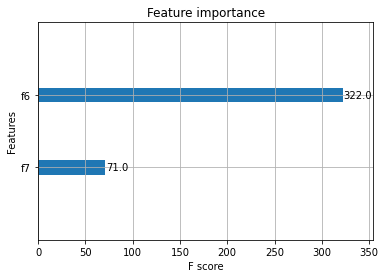

In [14]:
plot_importance(xgb_r)
plt.show()

In [15]:
xgb_r.score(X_test, y_test)

0.9965704768060302

In [16]:
y_test

array([20.43948575, 50.23898879, 55.97336806, ..., 86.32453453,
        6.16682555, 47.60721095])

In [17]:
pred

array([21.508537, 48.59008 , 54.149868, ..., 84.24228 ,  5.839703,
       46.495804], dtype=float32)

Building Polynomial Regression

In [18]:
from sklearn.preprocessing import PolynomialFeatures

In [19]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [20]:
poly_features = poly.fit_transform(df_train[['6', '7']])

In [21]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, target, test_size=0.2, random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
poly_reg_model = LinearRegression()

In [24]:
poly_reg_model.fit(X_train, y_train)

LinearRegression()

In [25]:
y_predicted = poly_reg_model.predict(X_test)

In [26]:
rmse = np.sqrt(MSE(y_test, y_predicted))
print("RMSE : % f" %(rmse))

RMSE :  0.000000


In [27]:
len(y_test)

18000

In [28]:
y_test

89610    20.439486
12456    50.238989
53403    55.973368
62905    98.506589
66339    60.348805
           ...    
48954    37.871374
38743    31.686006
57097    86.324535
54782     6.166826
54495    47.607211
Name: target, Length: 18000, dtype: float64

In [29]:
y_predicted

array([20.43948575, 50.23898879, 55.97336806, ..., 86.32453453,
        6.16682555, 47.60721095])

Predicting for Test 

In [41]:
std_scaler = StandardScaler()
 
df_scaled = std_scaler.fit_transform(test_data[['6', '7']])
df_scaled = pd.DataFrame(df_scaled, columns=['6', '7'])

In [42]:
X_test = np.array(df_scaled)

In [45]:
test_pred = poly_reg_model.predict(poly.fit_transform(X_test))

In [46]:
test_pred

array([11.68415891, 78.63112126,  7.8645647 , ..., 23.50866699,
       17.07250013, 93.44767787])

In [47]:
test_data['target'] = test_pred

In [48]:
test_data

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
0,259,388,402,340,156,382,3.316625,0.218760,1,164,...,10.227235,0.889111,9.190222,4.670908,0.931525,7.634177,0.158196,13.432551,2.511191,11.684159
1,441,192,381,421,452,123,-8.888194,0.700228,0,349,...,9.339161,4.221861,0.595563,13.865748,0.328453,11.507599,9.107966,1.302407,11.105604,78.631121
2,83,129,107,156,247,191,2.645751,0.494556,1,297,...,10.670237,10.350867,5.134417,5.898995,8.374986,4.638049,3.160023,2.243799,5.073030,7.864565
3,183,438,191,116,491,403,-6.164414,0.511117,0,272,...,12.782579,0.513072,0.321295,11.334062,11.735511,1.911520,8.365676,4.877288,11.601819,37.737969
4,449,156,310,188,279,465,8.000000,0.756416,1,90,...,1.140498,14.165074,7.688796,5.079241,8.152186,1.680403,13.215111,5.823109,1.038015,65.958060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,221,246,314,406,464,317,6.708204,0.436684,1,205,...,12.306512,7.778209,5.698493,10.023215,4.959409,4.056025,4.642375,4.533745,6.754558,46.425700
9996,152,157,32,133,369,261,5.656854,0.986208,1,457,...,13.176561,6.697370,4.119232,2.190155,14.555999,7.786794,9.414130,5.413161,4.134093,33.815077
9997,349,240,355,97,93,176,4.690416,0.830543,1,287,...,0.941523,3.555292,12.572057,7.058367,12.999451,1.901825,5.100031,1.498432,8.093801,23.508667
9998,427,70,63,265,62,150,4.000000,0.502337,1,124,...,1.593796,9.902159,2.548667,11.339210,14.192310,14.142207,9.966924,8.538981,7.036367,17.072500


In [49]:
test_data.to_csv('/content/test_with_predicted_target.csv')